In [2]:
"""
This file trains a neural network model to classify images of clothing, like sneakers and shirts.
This file is with respect to the following tutorial by tensorflow documentation.
https://www.tensorflow.org/tutorials/keras/basic_classification
"""

'\nThis file is with respect to the following tutorial by tensorflow documentation.\nhttps://www.tensorflow.org/tutorials/keras/basic_classification\n'

In [24]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [19]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [25]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [26]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_images)

60000

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_images)

10000

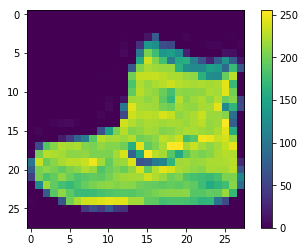

In [40]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [41]:
# Normalize
# Pixel values fall in the range of 0 to 255
train_images = train_images / 255.0
test_images = test_images / 255.0

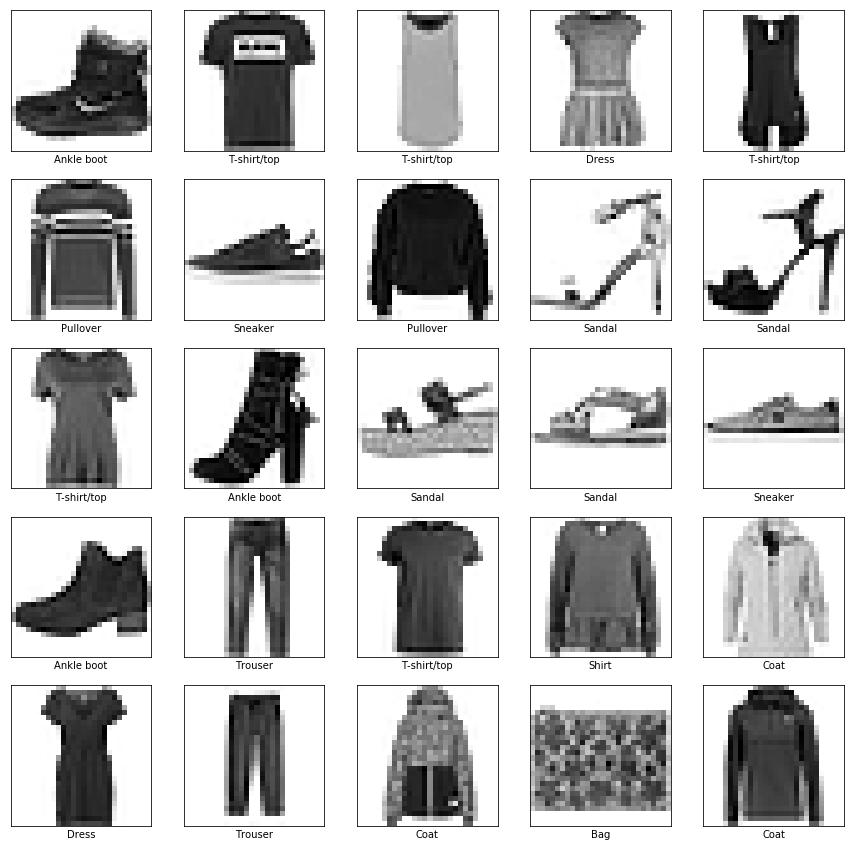

In [53]:
# Display the first 25 figures
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [70]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [71]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.4992 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.3770 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.3374 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3110 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2947 - acc: 0.8913


In [73]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.875


In [74]:
predictions = model.predict(test_images)

In [75]:
predictions[0]

array([  1.52203552e-06,   1.03966071e-08,   8.08533187e-08,
         6.03889774e-08,   6.28610167e-07,   7.37067254e-04,
         8.89539592e-07,   1.99410561e-02,   4.30379123e-06,
         9.79314387e-01], dtype=float32)

In [76]:
np.argmax(predictions[0])

9

In [77]:
test_labels[0]

9